# Getting the accuracy of the Power required estimates, from Eta and CT methods only!

Goal: 
Check the actual electrical power draw against the estimated power draw, calculated by the eta and thrust methods

In [39]:
# Getting packages #
%matplotlib widget

from os import sys
sys.path.append("../.")

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import plotly.express as px

import main
from main import flight
from main import analysis
import propellers
import motors
from aircraft import airplane
import cl_finders

import data_exporter

from matplotlib.backends.backend_pdf import PdfPages

In [40]:
## Pickling that DF for Later ##
df_100Hz = pd.read_pickle("../data/june15_2022_100Hz.pkl")
#df_60Hz = pd.read_pickle("./data/june15_2022_60Hz.pkl")
#df_1Hz = pd.read_pickle("./data/june15_2022_1Hz.pkl")

df = df_100Hz.interpolate(method="linear")

In [41]:
# Vehicle parameters
prop = propellers.aeronaut185x12() # Using aeronaut 20x8 for this flight
motor = motors.U7V2_280KV()  # Using U7 V2 motor

mass = 12.727 # Estimated with virtual bolt included
span = 6.28
chord = 0.395
createv = airplane(mass, chord, span)

P_systems = 4 # Amount of power consumed by everything except the ESC & motor

highorderpolar = True

In [42]:
### Mask Initialization ###

# Generating Start/End Times for Segments #
# Producing masks for dataframe

def get_mask(df, start, end, year, month, day):
    # Getting boolean mask from start and end times
    start_time = get_datetime(start, year, month, day)
    end_time = get_datetime(end, year, month, day)
    mask = (df.index > start_time) & (df.index < end_time)
    return mask

def get_datetime(hour_string, year, month, day):
    # Results completed datetime from hour string, and date
    split_nums = hour_string.split(':')
    hours = int(split_nums[0])
    minutes = int(split_nums[1])
    seconds = int(split_nums[2])
    return pd.Timestamp(year=year, month=month, day=day, hour=hours, minute=minutes, second=seconds)

year = 2022
month = 6
day = 15

# Cruise Masking

seg_times = np.array([['08:54:36','09:04:09'],
                      ['09:04:36','09:16:09'],
                      ['09:16:11','09:26:10'],
                      ['09:26:10','09:36:09'],
                      ['09:57:40','10:02:04'],
                      ['10:02:14','10:07:21'],
                      ['10:07:29','10:17:21'],
                      ['10:18:25','10:24:34'],
                      ['10:25:52','10:27:55']])
masks = []
for i in range(np.shape(seg_times)[0]):
    mask = get_mask(df, seg_times[i,0], seg_times[i,1], year, month, day)
    masks.append(mask)

# Descending Masking

seg_times = np.array([['07:22:05','07:22:53'],
                      ['07:26:03','07:27:00'],
                      ['07:30:07','07:31:07'],
                      ['07:34:02','07:35:07'],
                      ['07:38:15','07:39:23'],
                      ['07:42:09','07:43:33'],
                      ['07:46:31','07:47:44'],
                      ['07:50:35','07:51:52'],
                      ['07:54:31','07:55:52'],
                      ['07:58:44','08:00:17'],
                      ['08:03:18','08:04:43'],
                      ['08:07:50','08:09:15'],
                      ['08:12:18','08:13:46'],
                      ['08:17:13','08:18:37'],
                      ['08:22:27','08:23:45'],
                      ['08:27:36','08:28:54'],
                      ['08:33:13','08:34:06'],
                      ['08:38:18','08:39:14'],
                      ['08:43:38','08:44:59'],
                      ['08:48:03','08:49:26']
                      ])
desc_masks = []
for i in range(np.shape(seg_times)[0]):
    mask = get_mask(df, seg_times[i,0], seg_times[i,1], year, month, day)
    desc_masks.append(mask)


/var/folders/x_/hvhbycx15x31bybxtb1h9ktc0000gn/T/ipykernel_35011/2126081776.py:28: RuntimeWarning: divide by zero encountered in true_divide
  J = v_tas / (n * prop.diameter)
/var/folders/x_/hvhbycx15x31bybxtb1h9ktc0000gn/T/ipykernel_35011/2126081776.py:28: RuntimeWarning: invalid value encountered in true_divide
  J = v_tas / (n * prop.diameter)
/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/Investigations/.././propellers.py:114: RuntimeWarning: invalid value encountered in add
  CT = -1.636*J**5 + 3.933*J**4 - 3.246*J**3 + 0.8995*J**2 - 0.09467*J**1 + 0.08651 # (11-18 Fit, Freewheel data)
/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/Investigations/.././propellers.py:122: RuntimeWarning: invalid value encountered in subtract
  CP = 0.2741*J**4 - 0.5853*J**3 + 0.3012*J**2 - 0.05987*J**1 + 0.04802 # (11-18 Fit, Freewheel data)
/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/Investigations/.././motors.py:53: RuntimeWarning: divide by zero enc

Freewheel thrust coefficient:  -0.00804445463199624 
 Advance Ratio:  0.8386905840958647 
 CP Freewheel:  5.129680916149404e-10


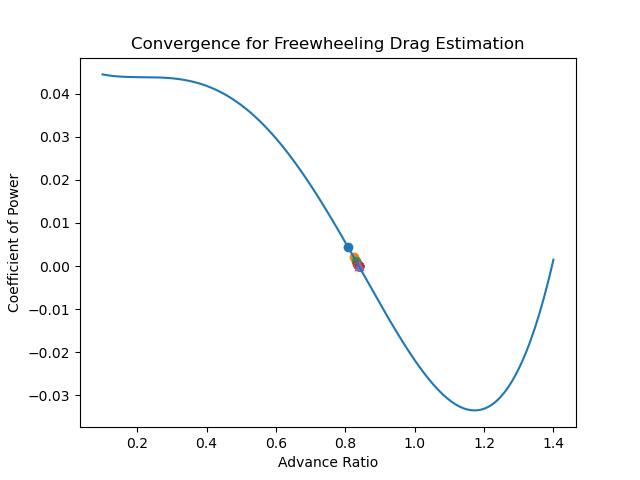

Propeller Drag[nan nan nan ...  0.  0.  0.]
Freewheel thrust coefficient:  -0.00804445463199624 
 Advance Ratio:  0.8386905840958647 
 CP Freewheel:  5.129680916149404e-10


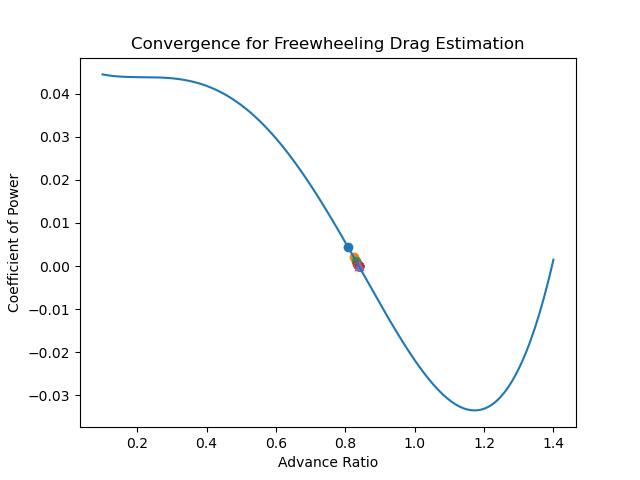

Propeller Drag[nan nan nan ...  0.  0.  0.]


/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/Investigations/.././cl_finders.py:117: RuntimeWarning: divide by zero encountered in reciprocal
  CD = p_required * (q * v * aircraft.area)**-1
/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/Investigations/.././cl_finders.py:117: RuntimeWarning: invalid value encountered in multiply
  CD = p_required * (q * v * aircraft.area)**-1
/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/Investigations/.././cl_finders.py:18: RuntimeWarning: divide by zero encountered in reciprocal
  CL = aircraft.weight * (np.cos(phi) * q * aircraft.area)**-1


In [43]:
############# Main Analysis ###############3

# Attitude 
phi = np.deg2rad(df["RollAngle"].to_numpy())            # Bank angle in radians
pitch = np.deg2rad(df["PitchAngle"].to_numpy())         # Pitch angle in radians

# Inertial Measurement Unit
U_dot = df["XAcc_IMU"].to_numpy()                       # Acceleration in X direction

# Atmospheric adjustments:
rho = df["Pressure"].to_numpy() * (287 * (df["Ambient_Temperature"].to_numpy()+273.15))**-1             # Density found from barometer pressure & airspeed sensor temperatures
v_eas = df["Airspeed_Sensor0"].to_numpy()                               # Equivalent SSL airspeed (m/s)
v_tas = v_eas * np.sqrt(1.225) * np.sqrt(rho)**-1   # the true airspeed
q = 0.5 * rho * v_tas**2                            # Dynamic pressure 

# For Descent method
h = df["Altitude_POS"].to_numpy()                   # Altitude
Vd_eas = df["DescendingXK"].to_numpy()                  # Descent Rate from EKF (is it true or EAS at SSL?)
Vd_tas = Vd_eas * np.sqrt(1.225) * np.sqrt(rho)**-1   # the true airspeed

# Ground speed limiter
v_dem = df["Airspeed_Demanded"].to_numpy()

# Propulsion characterization
n = df["MotorRPM"].to_numpy() / 60                               # Revolutions per second
i_esc = df["EscCurrent"].to_numpy()
v_esc = df["EscVoltage"].to_numpy()
J = v_tas / (n * prop.diameter)
eff = prop.efficiency(J) * motor.efficiency(n, i_esc)

# Estimated propulsive power (New Fitting)
P_eta = cl_finders.eta_steady(prop, motor, v_tas, n, i_esc, v_esc)
P_ct = cl_finders.thrust_steady(prop, rho, v_tas, n)
P_desc = cl_finders.desc2preq(createv, prop, rho, v_tas, n, q, Vd_tas)

P_desc_acc = cl_finders.descU2preq(createv, prop, rho, v_tas, n, q, Vd_tas, pitch, U_dot)
P_hybrid = cl_finders.cruise_highorder(createv, prop, rho, v_tas, Vd_tas, n, pitch, U_dot)

# Getting drag coefficient
Cd_eta = cl_finders.preq2cd(createv, v_tas, q, P_eta)
Cd_ct = cl_finders.preq2cd(createv, v_tas, q, P_ct)
Cd_desc = cl_finders.preq2cd(createv, v_tas, q, P_desc)
Cd_desc_acc = cl_finders.preq2cd(createv, v_tas, q, P_desc_acc)

Cd_hybrid = cl_finders.preq2cd(createv, v_tas, q, P_hybrid)

# Getting lift coefficient
CL = cl_finders.cl_banked(createv, q, phi)

In [46]:
# Getting Error of Power Estimates:
P_prop_eta = P_eta + (-1 * createv.weight * Vd_tas)  # Power required estimate using Eta Method
P_elec_eta = (P_prop_eta / eff)# + P_systems  # Electrical power draw estimate using Eta Method

P_prop_ct = P_ct + (-1 * createv.weight * Vd_tas)  # Power required estimate using CT Method
P_elec_ct = (P_prop_ct / eff)# + P_systems  # Electrical power draw estimate using CT Method

# Storing results in DataFrame
df["PowerEstimateEta"] = P_elec_eta
df["PowerEstimateCt"] = P_elec_ct

# Getting Electrical Power Directly from ESC
df["PowerElectrical_2"] = df["MainBatteryCurrent"] * df["MainBatteryVoltage"]
df["PowerElectrical"] = df["EscCurrent"] * df["EscVoltage"]

# Finding error from actual electrical power draw
df["PowerEstErrorEta"] = ((df["PowerElectrical"] - df["PowerEstimateEta"]) / df["PowerElectrical"]) * 100
df["PowerEstErrorCt"] = ((df["PowerElectrical"] - df["PowerEstimateCt"]) / df["PowerElectrical"]) * 100

/var/folders/x_/hvhbycx15x31bybxtb1h9ktc0000gn/T/ipykernel_35011/1504608838.py:3: RuntimeWarning: divide by zero encountered in true_divide
  P_elec_eta = (P_prop_eta / eff)# + P_systems  # Electrical power draw estimate using Eta Method
/var/folders/x_/hvhbycx15x31bybxtb1h9ktc0000gn/T/ipykernel_35011/1504608838.py:6: RuntimeWarning: divide by zero encountered in true_divide
  P_elec_ct = (P_prop_ct / eff)# + P_systems  # Electrical power draw estimate using CT Method


96.79400306705836
0.34225454012444345
2.8007979893520485
95.52554056170482
0.004973847899250927
2.7385754997487766
88.14173742366917
-0.060715096152634374
2.60908871908282
99.55292866977814
0.3304980703030651
2.986689009897333
125.04130374969026
-1.3668815695964724
4.868347484702184
119.79710420104963
1.925243970787264
7.940792702540477
111.37263042118174
0.5506709834008774
4.613055142158217
87.21425035959052
0.8309636821525004
3.7610798975284894
105.26847946968206
4.5233461453941
7.510964935252417
1.5630883875969481
1.2868356131546144
0.964045865035156
0.6591504278477388
5.664804195599605
-7.867658849304907
1.245128726070253
3.8582170101162814
7.625918081830175


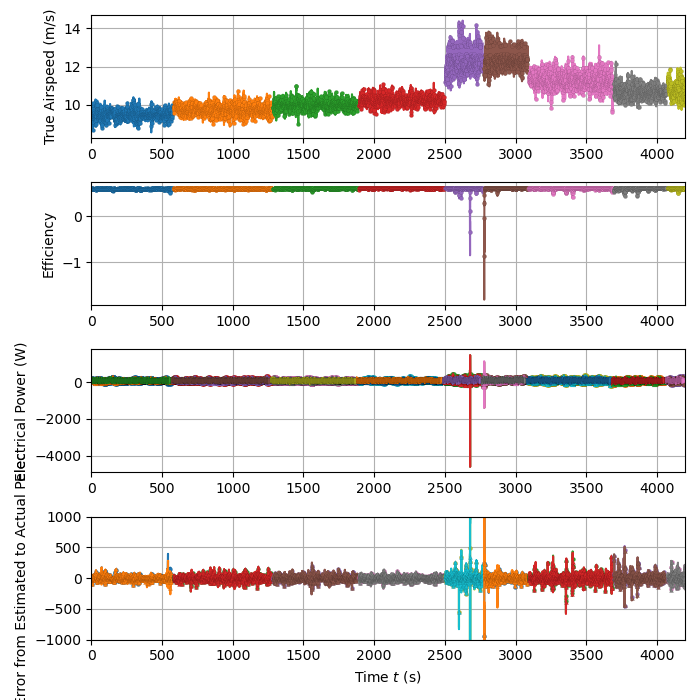

In [47]:
# Plotting Steady-level Data Runs #
markerstyle = 'o'
markerevery = 80
markedgew = 0.05
plt.figure(figsize=(7,7))
ax1 = plt.subplot(4,1,1)
t_init = 0
for i in range(len(masks)):
    time_s = np.linspace(t_init, (len(v_tas[masks[i]])-1)/100 + t_init, len(v_tas[masks[i]]))
    ax1.plot(time_s, v_tas[masks[i]], marker=markerstyle, markeredgecolor=[0,0,0], markersize=3, markevery=markerevery, markeredgewidth=markedgew)
    t_init = time_s[-1]+10
ax1.set_ylabel("True Airspeed (m/s)")
ax1.grid(which='major', linestyle='-')
ax1.grid(which='minor', linestyle=':', color='grey')
ax1.autoscale(enable=True, axis='x', tight=True)

ax0 = plt.subplot(4,1,2, sharex=ax1)
t_init = 0
for i in range(len(masks)):
    time_s = np.linspace(t_init, (len(v_tas[masks[i]])-1)/100 + t_init, len(v_tas[masks[i]]))
    ax0.plot(time_s, eff[masks[i]], marker=markerstyle, markeredgecolor=[0,0,0], markersize=3, markevery=markerevery, markeredgewidth=markedgew)
    t_init = time_s[-1]+10
ax0.set_ylabel("Efficiency")
ax0.grid(which='major', linestyle='-')
ax0.grid(which='minor', linestyle=':', color='grey')
ax0.autoscale(enable=True, axis='x', tight=True)

ax2 = plt.subplot(4,1,3, sharex=ax1)
t_init = 0
for i in range(len(masks)):
    time_s = np.linspace(t_init, (len(v_tas[masks[i]])-1)/100 + t_init, len(v_tas[masks[i]]))
    ax2.plot(time_s, df.PowerEstimateEta[masks[i]], marker=markerstyle, markeredgecolor=[0,0,0], markersize=5, markevery=markerevery, markeredgewidth=markedgew, label='Eta P_elec Estimate')
    ax2.plot(time_s, df.PowerEstimateCt[masks[i]], marker='^', markeredgecolor=[0,0,0], markersize=5, markevery=markerevery, markeredgewidth=markedgew, label='CT P_elec Estimate')
    ax2.plot(time_s, df.PowerElectrical[masks[i]], marker='>', markeredgecolor=[0,0,0], markersize=5, markevery=markerevery, markeredgewidth=markedgew, label='Actual Electrical power')
    print(df.PowerElectrical[masks[i]].mean())
    print(df.PowerElectrical[masks[i]].mean() - df.PowerEstimateEta[masks[i]].mean())
    print(df.PowerElectrical[masks[i]].mean() - df.PowerEstimateCt[masks[i]].mean())
    t_init = time_s[-1]+10
ax2.set_ylabel("Electrical Power (W)")
ax2.grid(which='major', linestyle='-')
ax2.grid(which='minor', linestyle=':', color='grey')
ax2.autoscale(enable=True, axis='x', tight=True)

ax3 = plt.subplot(4,1,4, sharex=ax1)
t_init = 0
for i in range(len(masks)):
    time_s = np.linspace(t_init, (len(v_tas[masks[i]])-1)/100 + t_init, len(v_tas[masks[i]]))
    ax3.plot(time_s, df.PowerEstErrorEta[masks[i]], marker=markerstyle, markeredgecolor=[0,0,0], markersize=3, markevery=markerevery, markeredgewidth=markedgew, label='Eta Estimate')
    ax3.plot(time_s, df.PowerEstErrorCt[masks[i]], marker='^', markeredgecolor=[0,0,0], markersize=3, markevery=markerevery, markeredgewidth=markedgew, label='CT Estimate')
    t_init = time_s[-1]+10
    print(df.PowerEstErrorEta[masks[i]].mean())
ax3.set_ylabel("Error from Estimated to Actual Pelec")
ax3.set_xlabel("Time $t$ (s)")
ax3.set_ylim([-1000,1000])
ax3.grid(which='major', linestyle='-')
ax3.grid(which='minor', linestyle=':', color='grey')
ax3.autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()